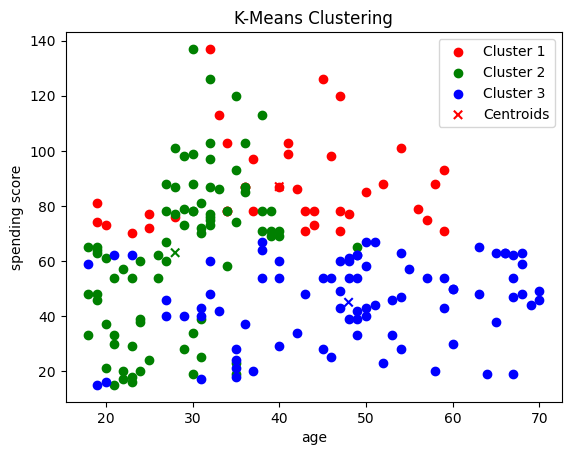

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, K, max_iterations=100):
    # Initialize the centroids randomly
    centroids = X[np.random.choice(range(X.shape[0]), K, replace=False)]

    # Initialize the labels array
    labels = np.zeros(X.shape[0])

    # Perform the K-means algorithm
    for _ in range(max_iterations):
        # Assign each data point to the closest centroid
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Update the centroids based on the mean of the assigned data points
        for i in range(K):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

    return centroids, labels

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')  # Replace 'your_dataset.csv' with the path to your actual dataset

# Extract the features
X = data[['Age', 'Annual Income (k$)','Spending Score (1-100)']].values  # Replace 'feature1', 'feature2', 'feature3' with the names of your features

# Set the number of clusters (K)
K = 3

# Perform K-means clustering
centroids, labels = k_means(X, K)

# Generate random colors for the clusters
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Add more colors as needed

# Plot the data points and centroids
for i in range(K):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c=colors[:K], marker='x', label='Centroids')

# Add labels and title
plt.xlabel('age')
plt.ylabel('spending score')
plt.title('K-Means Clustering')

# Show the legend
plt.legend()

# Display the plot
plt.show()
